# Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import itertools

# Acquire data

The data was acquire in kaggle.com(see references)

* Features V1, V2, ... V28 are the principal components obtained with PCA;

In [4]:
data = pd.read_csv('data/creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Analyze by describing data

## Which features are avaliable in the dataset?

In [5]:
data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

## Which features are categorical?

categorical: 'Class'

## Which features are numerical?

Numerical: 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
'V28', 'Amount'

## Which features are mixed data types?

None of the features are mixed data types

## Which features may contain errors or typos?

there are no errors or typos

In [9]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
86157,61109.0,-1.792285,-4.570566,-1.018460,2.333768,-1.793743,0.348518,1.887298,-0.237308,-0.367832,...,0.676582,-1.541985,-1.110851,0.215297,-0.433727,-0.871305,-0.251853,0.281619,1511.35,0
180835,124718.0,2.127092,-0.104795,-1.510509,0.165098,0.376727,-0.534866,0.131107,-0.228090,0.648924,...,-0.355132,-0.888580,0.220288,-1.069905,-0.181819,0.266895,-0.070533,-0.071655,1.79,0
187560,127587.0,-2.560439,-3.512565,-1.595612,2.201443,4.898354,-4.083969,-0.912766,-0.146964,-0.239858,...,0.908757,1.509268,0.978461,-0.020605,-0.944762,-0.356543,0.413420,0.495486,106.00,0
268730,163358.0,1.761507,-0.603768,-2.468300,-0.242980,1.039035,0.350466,0.447401,0.076032,0.261082,...,0.242811,0.554769,-0.087102,-1.621855,0.087885,0.276078,-0.069087,-0.084975,125.99,0
143382,85313.0,-0.934846,1.203201,1.722838,1.737372,0.445736,0.150310,0.505728,0.150895,-1.267782,...,-0.002729,-0.227170,0.171870,0.147449,-0.818835,-0.412520,-0.247544,0.178423,3.12,0


## Which features contain null, blank or empty values?

there are no null, blank or empty values

In [10]:
data.isnull().sum()/data.shape[0]*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

## What are the data types?

30 floats type and 1 integer type

In [13]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## What is the distribution of numerical features values across the sample?

* 80% of the amount are less than 100
* there are 492 cases of 'Class' == 1

In [14]:
data.describe(percentiles=[.2, .4, .6, .8])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
20%,47694.200000,-1.134663e+00,-7.908142e-01,-1.169050e+00,-1.066085e+00,-8.595815e-01,-8.781527e-01,-6.833164e-01,-2.662999e-01,-8.088755e-01,...,-2.663929e-01,-6.416046e-01,-2.037425e-01,-4.442769e-01,-3.917190e-01,-3.895481e-01,-9.111428e-02,-6.544115e-02,3.570000,0.000000
40%,73261.400000,-4.267559e-01,-1.538049e-01,-1.990610e-01,-3.941610e-01,-2.901118e-01,-4.794725e-01,-1.593408e-01,-6.605715e-02,-2.577302e-01,...,-1.064266e-01,-2.018541e-01,-6.512670e-02,-4.580667e-02,-1.288661e-01,-1.663338e-01,-2.436683e-02,-1.195983e-02,13.000000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
60%,120396.000000,1.035107e+00,3.027378e-01,4.970396e-01,2.848562e-01,1.866249e-01,-4.819964e-02,2.135123e-01,1.204889e-01,1.761695e-01,...,5.038722e-02,2.005957e-01,4.484023e-02,1.664115e-01,1.586211e-01,8.611185e-02,2.922621e-02,2.692801e-02,37.000000,0.000000
80%,145247.800000,1.694936e+00,9.573136e-01,1.215700e+00,9.861875e-01,8.022349e-01,6.289952e-01,6.983318e-01,4.355289e-01,7.915832e-01,...,2.354311e-01,6.485158e-01,1.942589e-01,5.323465e-01,4.175428e-01,3.602736e-01,1.352785e-01,1.013742e-01,100.000000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [39]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes

0    284315
1       492
Name: Class, dtype: int64

## What is the distribution of categorical features?

Class is a categorical feature, but it was seen before

# Assumptions based on data analysis

## Correlating

We want to know how well does each feature correlate with 'Class'

## Completing

There are no features values for completing

## Correcting

We may want to rescale time and amount, since features v1-v28 are all made of PCA transformations and don't need to be rescale.

## Creating

Apparently there are no need for creating new features.

## Classifing

We may also add a assumption that amount can be very small for frauds 

# Analyse by visualizing data

## Correlating numerical feature

<b>Observations</b>
* Time & V3 (-0.42)
* Amount & V2 (-0.53)
* Amount & V4 (0.4)

While these correlations are high, I don't expect it to run the risk of multicollinearity.

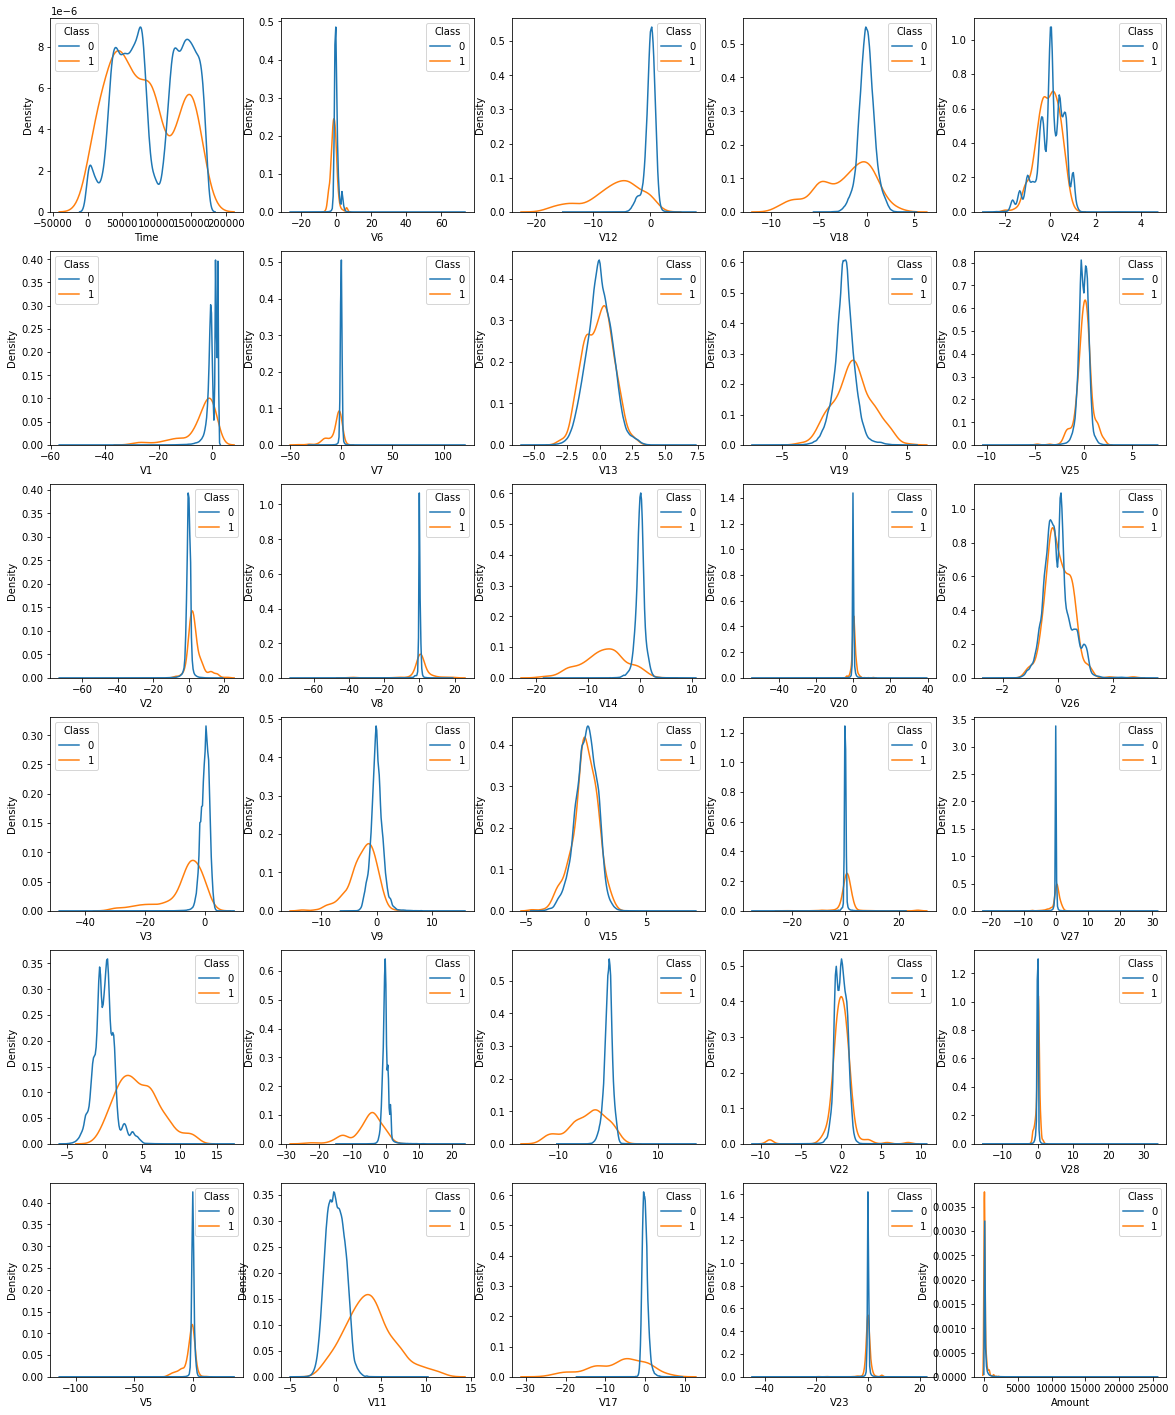

In [60]:
columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
           'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
           'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
           'V28', 'Amount']

fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(20,25))

count = 0
for i in range(5):
    for j in range(6):
        sns.kdeplot(x=columns[count], hue='Class',common_norm=False, data=data, ax=axs[j, i])
        count += 1
        
plt.show();

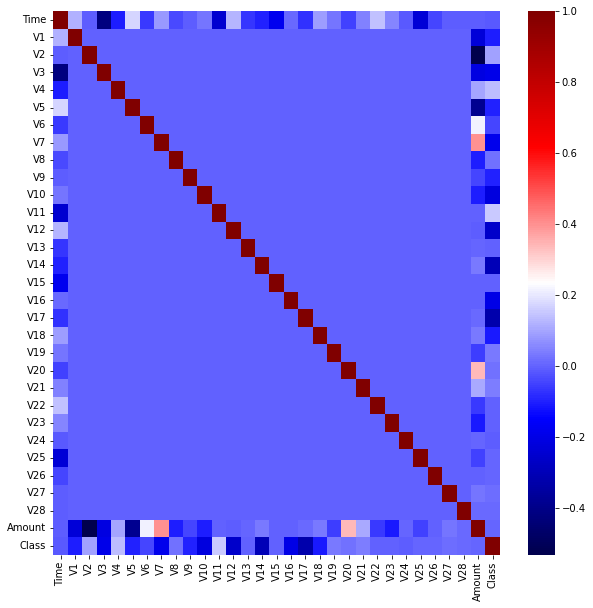

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [62]:
data.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

# Wrangle data

Let us now execute our decisions and assumptions for correcting, creating and completing goal

## Correcting the scale

In [6]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['normTime'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-0.073403


# Model

Here we will have two approaches, the first will deal with unbalanced data and the other will ignore the unbalance

## Dealing with Unbalance data

Since our data have only 492 frauds('Class'==1) against 284315 non frauds,
we need to overcome this by some approach like undersample or oversample.

* First we will use recall, since its better to mistake and say that some transaction was a fraud than the contrariwise
* Resemple the data(50/50) using undersample technique because works well when we have a lot of data.

### Undersampled

First we get the numbers of data points in the minority class and pick up the indices of the majority and minority classes

In [9]:
# Numbers of data points in the minority class
n_frauds = len(data[data.Class == 1])

# Indices of the majority class
non_fraud_indices = data[data.Class == 0].index
# Indices of the minority class
fraud_indices = np.array(data[data.Class == 1].index)

Then we randomly select "n_frauds" indices of the majority class and concatenate them

In [10]:
# Selecting "n_frauds" indices of the majority class
random_non_fraud_indices = np.random.choice(non_fraud_indices, n_frauds, replace = False)
random_non_fraud_indices = np.array(random_non_fraud_indices)

# concatenate
under_sample_indices = np.concatenate([random_non_fraud_indices, fraud_indices])

At last, we pick the data correspond to that indices and slip into X_undersample and y_undersample

In [11]:
# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

Checking the ratios

In [12]:
print("Percentage of non fraud transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of non fraud transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


## Split in train and test data

### Whole dataset

In [7]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("len of train dataset: ", len(X_train))
print("len of test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

len of train dataset:  199364
len of test dataset:  85443
Total number of transactions:  284807


### Undersample dataset

In [13]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)

print("len of train dataset: ", len(X_train_undersample))
print("len of test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

len of train dataset:  688
len of test dataset:  296
Total number of transactions:  984


## Finding the best parameters

We will use a cross validation approach for each set of parameters,
then we calcule the mean of recall and find the parameters that maximaxe that.

### Whole dataset

In [17]:
logistic_regression_params = {
    "penalty": ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [500],
    'solver':['liblinear']
}

grid_logistic_regression_params = GridSearchCV(
    LogisticRegression(),
    logistic_regression_params, 
    scoring='recall'
)

grid_logistic_regression_params.fit(
    X_train,
    y_train.values.ravel()
)

lr_model_with_whole_dataset = grid_logistic_regression_params.best_estimator_

print('best_params: ', grid_logistic_regression_params.best_params_)
print('best_score:  ', grid_logistic_regression_params.best_score_)

best_params:  {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
best_score:   0.6202898550724638


### Undersample dataset

In [18]:
logistic_regression_params = {
    "penalty": ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [500],
    'solver':['liblinear']
}

grid_logistic_regression_params = GridSearchCV(
    LogisticRegression(),
    logistic_regression_params, 
    scoring='recall'
)

grid_logistic_regression_params.fit(
    X_train_undersample,
    y_train_undersample.values.ravel()
)

lr_model_with_undersample_dataset = grid_logistic_regression_params.best_estimator_

print('best_params: ', grid_logistic_regression_params.best_params_)
print('best_score:  ', grid_logistic_regression_params.best_score_)

/media/desktop-mint/Dados/Projetos/kaggle/credit_fraud/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


best_params:  {'C': 0.001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
best_score:   0.9649616368286444


# Model Evaluation

## Confusion matrix

### Whole dataset

Recall score:  0.6190476190476191


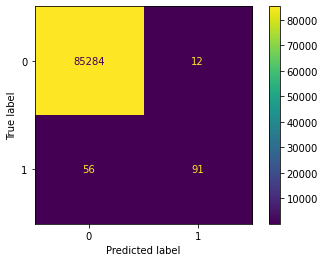

In [19]:
y_pred = lr_model_with_whole_dataset.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(
    y_test, 
    y_pred, 
    labels=lr_model_with_undersample_dataset.classes_
)

# Calcule the recall score
recall_score_value = recall_score(y_test, y_pred)
print("Recall score: ", recall_score_value)

# display the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=lr_model_with_undersample_dataset.classes_
)

disp.plot()
plt.show();

### Undersample dataset

Recall score:  0.9664429530201343


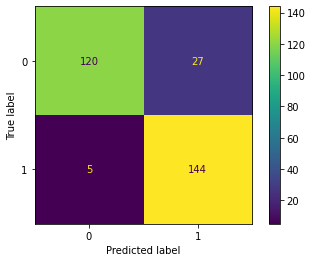

In [20]:
y_pred_undersample = lr_model_with_undersample_dataset.predict(X_test_undersample)

# Compute confusion matrix
cm = confusion_matrix(
    y_test_undersample, 
    y_pred_undersample, 
    labels=lr_model_with_undersample_dataset.classes_
)

# Calcule the recall score
recall_score_value = recall_score(y_test_undersample, y_pred_undersample)
print("Recall score: ", recall_score_value)

# display the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=lr_model_with_undersample_dataset.classes_
)

disp.plot()
plt.show();

## Plotting ROC Curve 

### Whole dataset

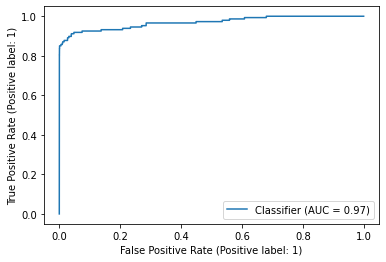

In [22]:
y_pred = lr_model_with_whole_dataset.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test.values.ravel(), y_pred)
plt.show();

### Undersample dataset

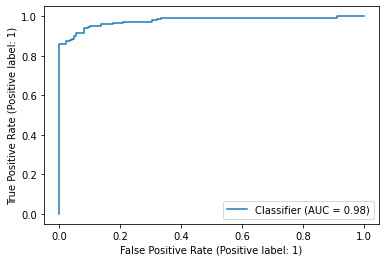

In [21]:
y_pred_undersample = lr_model_with_undersample_dataset.decision_function(X_test_undersample)
RocCurveDisplay.from_predictions(y_test_undersample.values.ravel(), y_pred_undersample)
plt.show();

# Conclusion

The project beggin with some inquires, then we check for multicolinearity and rescale the necessary data. Two approaches was choosen, one with undersample technique and another without, both combined with a cross validation technique for finding the best parameters. The results shows that the undersample approach was higher with a recall score on test data of <b>0.96</b> against <b>0.61</b> without undersample. Which leads us with the choice of undersample technique as a better approach to the final model.

# References

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

https://www.kaggle.com/code/joparga3/in-depth-skewed-data-classif-93-recall-acc-now/notebook

https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation